In [41]:
#!pip install opencv-python-headless
#!pip install matplotlib
#!pip install numpy

In [42]:
import urllib
import numpy as np
import cv2

from io import BytesIO
from matplotlib import pyplot as plt

In [43]:
cv2.__version__

'4.5.5'

In [ ]:
snap_url = 'http://172.17.2.213/snap.jpeg'
response = urllib.request.urlopen(snap_url)
snap = response.read()

In [416]:
# snap_no_mail_and_lights_daytime.jpg
# snap_no_mail_no_lights_daytime.jpg
# snap_with_mail_and_lights_daytime.jpg
# snap_with_mail_no_lights_daytime.jpg
src = 'snap_no_mail_and_lights_daytime.jpg'
with open(src, 'rb') as src_fd:
    snap = src_fd.read()

In [417]:
# Cast snapshot into a bytearray for ingestion by OpenCV:
nparr = np.frombuffer(snap, dtype=np.uint8)
img = cv2.imdecode(nparr, flags=1)

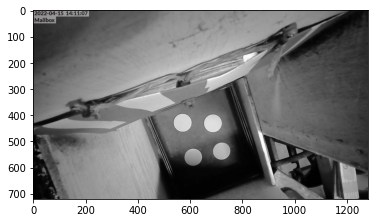

In [418]:
# Show the original camera snapshot:
plt.imshow(img)

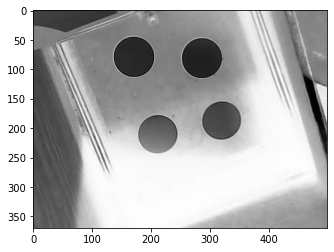

In [419]:
# Invert the snapshot and crop the area of interest
inverted = cv2.bitwise_not(img)
aoi = inverted[350:720, 400:900]
plt.imshow(aoi)

In [420]:
# Set our filtering parameters
# Initialize parameter setting using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()
 
# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100
 
# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.7
 
# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.2
     
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

In [421]:
detector = cv2.SimpleBlobDetector_create(params)

In [422]:
# Detect keypoints in area of interest
keypoints = detector.detect(aoi)

# How many keypoints did we detect?
# 0 = indicates dots are covered
# 4 = all dots visible
len(keypoints)

4

In [423]:
# Draw keypoints on area of interest:
im_with_keypoints = cv2.drawKeypoints(aoi, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

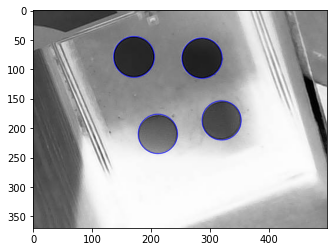

In [424]:
# Show the area of interest with keypoints indicated:
plt.imshow(im_with_keypoints)